# Annotated Honey Bee Images
### Apis mellifera across the USA with Location, Date, Health, and more labels
------


Corresponds each image to date, time, location, subspecies, health, caste, and pollen information. Labeling semi-automated by forms completed by the beekeeper who submitted the video through email.


Context

Every third bite of food relies on pollination by bees. At the same time, this past winter honeybee hive losses have exceeded 60% in some states. How can we address this issue? How can we better understand our bees? And most importantly, how can we save them before it's too late?

While many indications of hive strength and health are visible on the inside of the hive, frequent check-ups on the hive are time-consuming and disruptive to the bees' workflow and hive in general. By investigating the bees that leave the hive, we can gain a more complete understanding of the hive itself. For example, an unhealthy hive infected with varroa mites will have bees with deformed wings or mites on their backs. These characteristics can be observed without opening the hive. To protect against robber bees, we could track the ratio of pollen-carrying bees vs those without. A large influx of bees without pollen may be an indication of robber bees. This dataset aims to provide basic visual data to train machine learning models to classify bees in these categories, paving the way for more intelligent hive monitoring or beekeeping in general.

Source: [Kaggle](https://www.kaggle.com/jenny18/honey-bee-annotated-images/version/2#)

In [42]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Cargando la Data

In [3]:
bees_data = pd.read_csv('bee_data.csv')

In [4]:
bees_data.head(5)

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


## Informacion de las variables

In [5]:
bees_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Data columns (total 9 columns):
file               5172 non-null object
date               5172 non-null object
time               5172 non-null object
location           5172 non-null object
zip code           5172 non-null int64
subspecies         5172 non-null object
health             5172 non-null object
pollen_carrying    5172 non-null bool
caste              5172 non-null object
dtypes: bool(1), int64(1), object(7)
memory usage: 328.4+ KB


Existen 5,172 instancias en el set de datos

### Conteo de valores en la columna *Health*

In [6]:
bees_data.health.value_counts()

healthy                       3384
few varrao, hive beetles       579
Varroa, Small Hive Beetles     472
ant problems                   457
hive being robbed              251
missing queen                   29
Name: health, dtype: int64

### Conteo de valores en la columna *Caste*

In [7]:
bees_data.caste.value_counts()

worker    5172
Name: caste, dtype: int64

Para la caracteristica casta solo existe una categoria en los 5,172 ejemplos 

### Conteo de valores en la columna *Subspecies*

In [8]:
bees_data.subspecies.value_counts()

Italian honey bee        3008
Russian honey bee         527
Carniolan honey bee       501
1 Mixed local stock 2     472
-1                        428
VSH Italian honey bee     199
Western honey bee          37
Name: subspecies, dtype: int64

Existen 7 categorias para las subespecie, el -1 significa que aun no esta identificada tendra clasificacion

## Explorando los archivos de imagenes

In [9]:
images_paths = 'bee_imgs/'

extensions = []
images_sizes = []
masks_sizes = []

image_shape = []


images_file_name = os.listdir(images_paths)

if ('.DS_Store' in images_file_name) : images_file_name.remove('.DS_Store') 
    
#print(images_file_name)

for img_file in images_file_name:
    ### get image_size
    img = Image.open(images_paths + img_file)
    width, height = img.size
    images_sizes.append((width, height))
    

## Tienen el mismo tamaño las imagenes?

In [10]:
print("Images sizes:")
print(set(images_sizes))

Images sizes:
{(85, 78), (32, 54), (142, 63), (53, 53), (199, 58), (57, 50), (39, 70), (85, 63), (90, 42), (73, 82), (131, 187), (97, 52), (41, 57), (151, 164), (79, 76), (191, 232), (48, 37), (94, 54), (76, 88), (45, 61), (66, 66), (67, 80), (49, 58), (106, 61), (92, 120), (111, 123), (77, 55), (82, 66), (50, 27), (53, 62), (57, 59), (40, 29), (78, 46), (192, 200), (48, 77), (125, 81), (72, 67), (73, 91), (54, 87), (110, 48), (145, 115), (41, 34), (170, 141), (79, 85), (61, 63), (119, 162), (66, 42), (88, 67), (69, 47), (37, 54), (113, 77), (94, 57), (76, 87), (42, 67), (45, 54), (392, 473), (49, 51), (111, 128), (77, 48), (82, 61), (45, 71), (70, 81), (57, 60), (78, 49), (99, 108), (48, 68), (175, 67), (140, 103), (72, 74), (90, 60), (54, 46), (58, 37), (61, 56), (66, 37), (202, 254), (37, 63), (76, 78), (77, 88), (42, 74), (45, 47), (49, 52), (70, 57), (91, 68), (92, 78), (74, 52), (45, 64), (135, 194), (211, 296), (70, 72), (57, 69), (38, 97), (183, 214), (95, 80), (78, 56), (46, 3

In [11]:
heights = np.array(images_sizes)[:,0]
widths = np.array(images_sizes)[:,1]

areas = heights  * widths

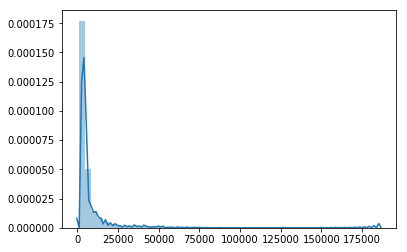

In [12]:
sns.distplot(areas)

#### Heights

In [13]:
pd.DataFrame(heights).describe()

,0
count,5172.000000
mean,74.422467
std,41.215791
min,27.000000
25%,48.000000
50%,62.000000
75%,84.000000
max,392.000000


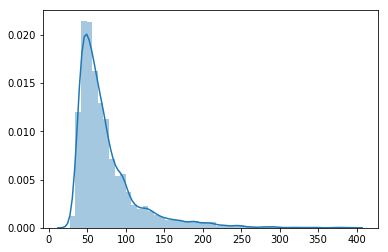

In [19]:
sns.distplot(heights)x

In [20]:
np.median(heights)

62.0

#### Widths

In [15]:
pd.DataFrame(widths).describe()

,0
count,5172.000000
mean,72.006767
std,40.467498
min,24.000000
25%,51.000000
50%,61.000000
75%,76.000000
max,520.000000


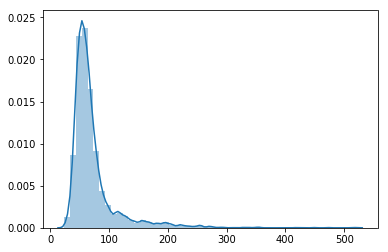

In [16]:
sns.distplot(widths)

In [18]:
np.median(widths)

61.0

Media del Ancho: 72
Media del Alto: 74

Mediana Ancho: 61
Mediana Alto: 62

Para el pre-procesamiento se van a redimencionar las imagenes a 62x62

# Explorando las imagenes

- healthy
- few varrao, hive beetles
- Varroa, Small Hive Beetles
- ant problems 
- hive being robbed
- missing queen 

In [71]:
def return_images_file_name(data_frame, filter_search, col_name):
    return data_frame[data_frame[col_name] == filter_search]['file'].tolist()

In [80]:
def graph_images(path, fields, max_number):
    for bee in fields[:max_number]:
        print(path + bee)
        img = mpimg.imread(path + bee)
        fig, ax = plt.subplots()
        ax.imshow(img,cmap="gray")

### healthy

In [81]:
healthy_bees = return_images_file_name(bees_data, 'healthy','health')

bee_imgs/017_029.png
bee_imgs/017_015.png
bee_imgs/017_001.png


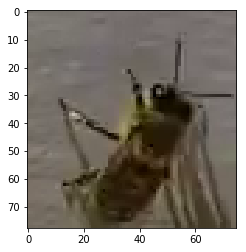

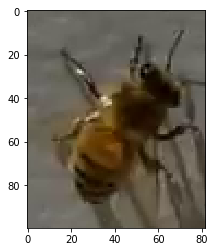

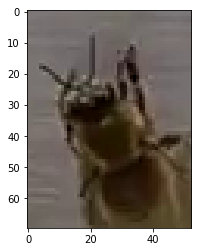

In [82]:
graph_images(images_paths, healthy_bees, 3)

### few varrao, hive beetles

In [85]:
few_varroa = return_images_file_name(bees_data, 'few varrao, hive beetles','health') 

bee_imgs/036_094.png
bee_imgs/036_080.png
bee_imgs/036_043.png


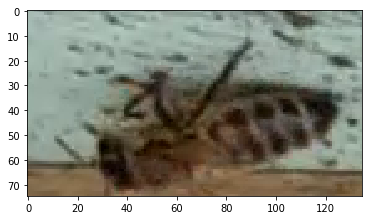

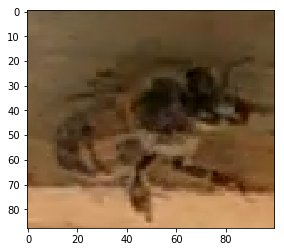

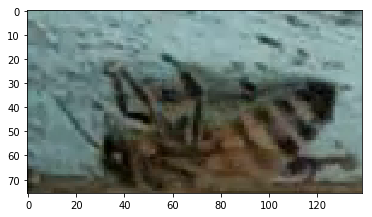

In [86]:
graph_images(images_paths, few_varroa, 3)

### Varroa, Small Hive Beetles

In [87]:
varroa_hive_beetles = return_images_file_name(bees_data, 'Varroa, Small Hive Beetles','health') 

bee_imgs/038_362.png
bee_imgs/038_404.png
bee_imgs/038_410.png
bee_imgs/038_376.png
bee_imgs/038_438.png


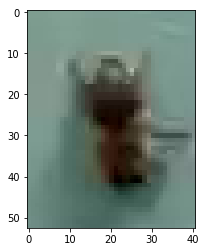

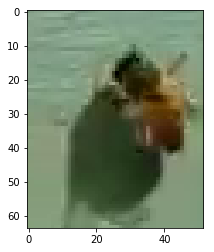

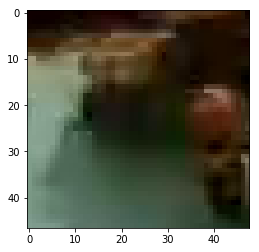

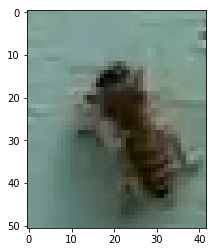

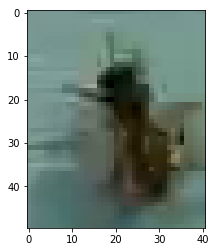

In [88]:
graph_images(images_paths, varroa_hive_beetles, 5)

### ant problems

In [90]:
ant_problems = return_images_file_name(bees_data, 'ant problems', 'health') 

bee_imgs/030_204.png
bee_imgs/030_562.png
bee_imgs/030_576.png
bee_imgs/030_210.png
bee_imgs/030_238.png


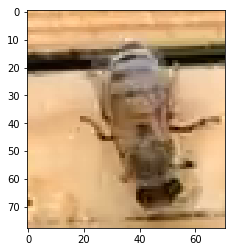

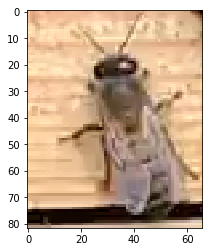

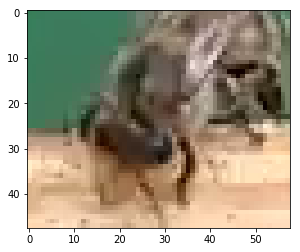

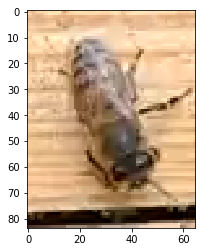

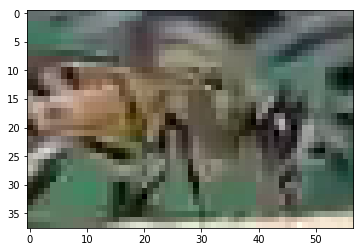

In [91]:
graph_images(images_paths, ant_problems, 5)